# Onion cell merged section performance

This notebook creates confusion matrixes to compare the perfomance of a model in all the sections of the onion_cell_merged dataset

### Imports

In [7]:
import os
import sys
import itertools

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict

import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


### Definitions

In [8]:
sys.path.insert(0, "../../")
from config import CROPPED_PATH, MODELS_PATH

# Paths
TEST_PATH = os.path.join(CROPPED_PATH, 'onion_cell_merged', 'labeled_images', 'test')
MODEL_PATH= os.path.join(MODELS_PATH, 'supervised', 'supervised_Encoder_SSIM+MAE4.keras')

results = []

### Functions

In [9]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

def plot_conf_matrix(model, generator, titulo='Confusion matrix'):
    ### RETRIVE TEST LABEL FROM GENERATOR ###
    test_num = sum(1 for _ in generator)
    label_test = []
    pred_test = []
    for i, batch in enumerate(generator):
        X, y = batch
        label_test.append(y)
        predictions = model.predict(X,verbose=0)
        predictions = tf.nn.softmax(predictions)
        pred_test.append(predictions)

    label_test = np.argmax(np.vstack(label_test), axis=1)
    

    ### COMPUTE PREDICTIONS ON TEST DATA ###
    pred_test = np.argmax(np.vstack(pred_test), axis=1)
    #rint(pred_test)
    accuracy=accuracy_score(label_test, pred_test)
    recall=recall_score(label_test, pred_test,pos_label=0)
    specificity=recall_score(label_test, pred_test,pos_label=1)
    precision = precision_score(label_test, pred_test, pos_label=0)
    # pred_test = pred_test[:label_test.shape[0],]
    ### ACCURACY ON TEST DATA ###
    print("-" * 40)
    print('ACCURACY:', accuracy)
    print('RECALL:',recall)
    print('PRECISION:', precision)
    print('SPECIFICITY:',specificity)
    print("-" * 40)
    print("\n")
    ### CONFUSION MATRIX ON TEST DATA ###
    cnf_matrix = confusion_matrix(label_test, pred_test)
    results.append({'Model': titulo, 'Accuracy': accuracy , 'Recall':recall,'Precision':precision,'Specificity':specificity})

    plt.figure(figsize=(7,7))
    plot_confusion_matrix(cnf_matrix, classes=['cell', 'not'], title=titulo)
    plt.title(titulo)
    plt.show()

### Get predictions

I0000 00:00:1746293784.704862  453467 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20910 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1746293785.274688  454317 service.cc:152] XLA service 0x74befc00ddb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746293785.274700  454317 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-05-03 14:36:25.279720: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746293785.320702  454317 cuda_dnn.cc:529] Loaded cuDNN version 90701
I0000 00:00:1746293785.595761  454317 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


----------------------------------------
ACCURACY: 0.82
RECALL: 0.64
PRECISION: 1.0
SPECIFICITY: 1.0
----------------------------------------




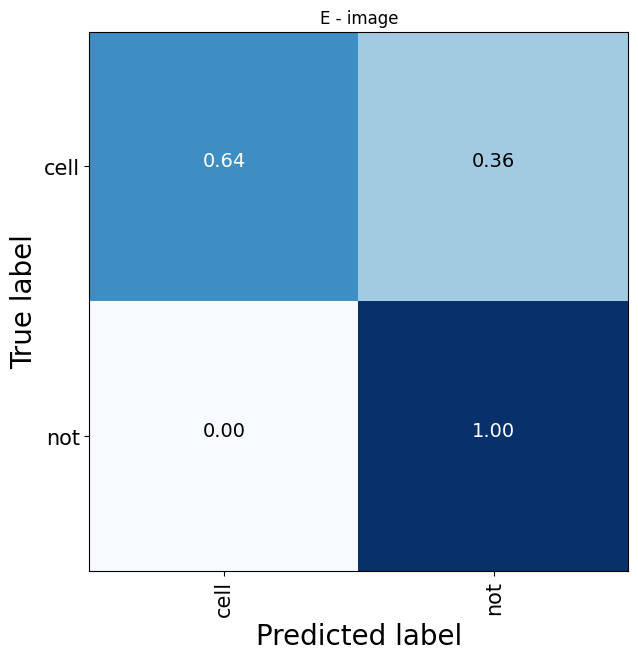

----------------------------------------
ACCURACY: 0.98
RECALL: 0.98
PRECISION: 0.98
SPECIFICITY: 0.98
----------------------------------------




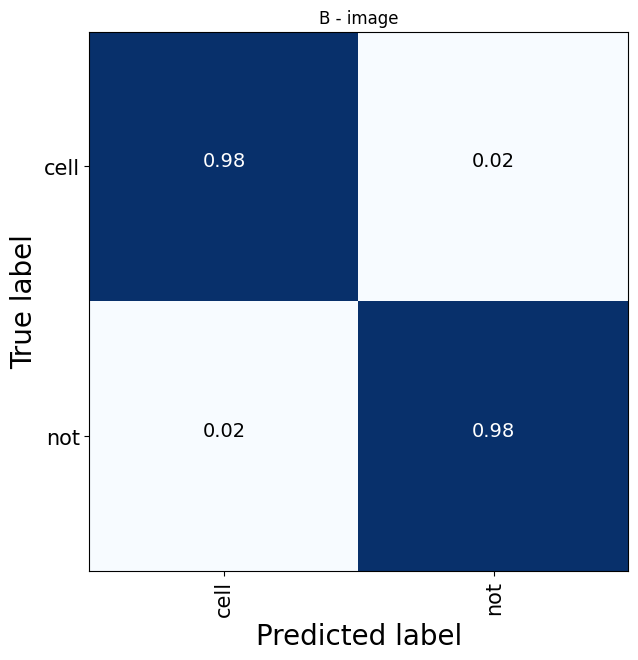

----------------------------------------
ACCURACY: 0.91
RECALL: 1.0
PRECISION: 0.847457627118644
SPECIFICITY: 0.82
----------------------------------------




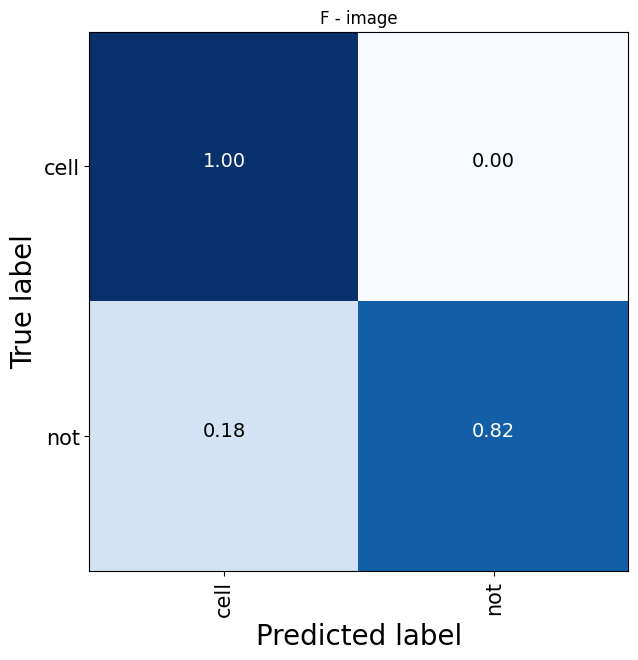

----------------------------------------
ACCURACY: 0.99
RECALL: 1.0
PRECISION: 0.9803921568627451
SPECIFICITY: 0.98
----------------------------------------




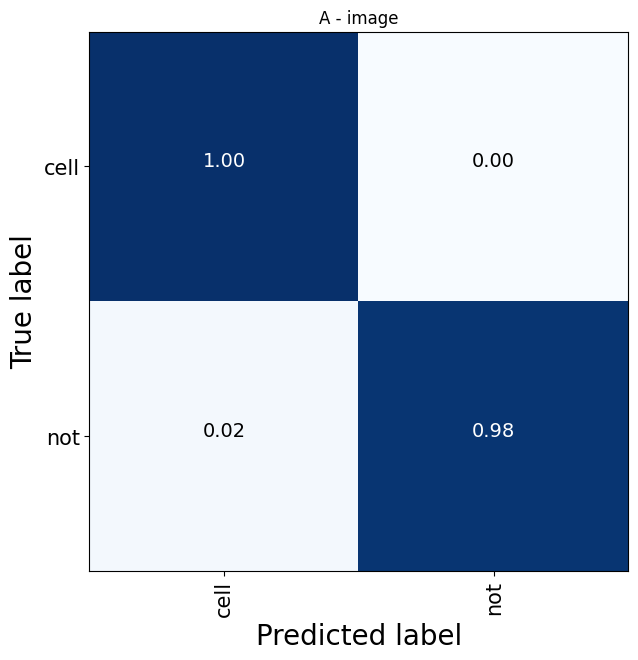

----------------------------------------
ACCURACY: 0.94
RECALL: 0.96
PRECISION: 0.9230769230769231
SPECIFICITY: 0.92
----------------------------------------




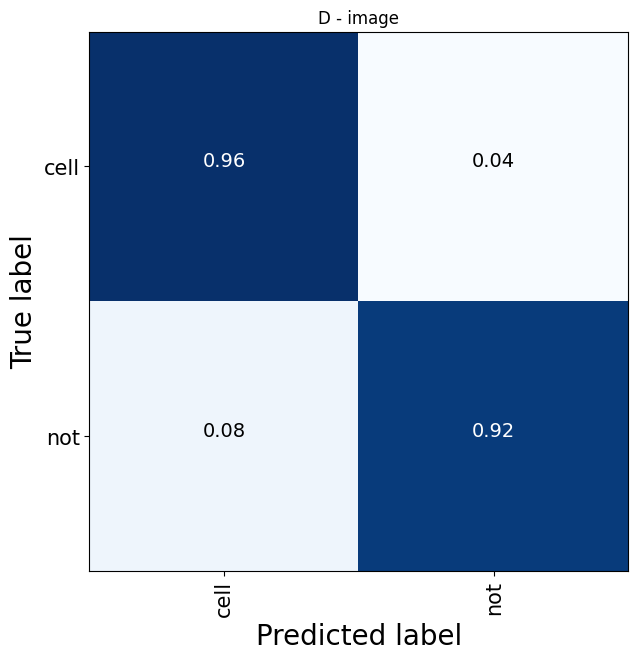

----------------------------------------
ACCURACY: 0.8
RECALL: 0.78
PRECISION: 0.8125
SPECIFICITY: 0.82
----------------------------------------




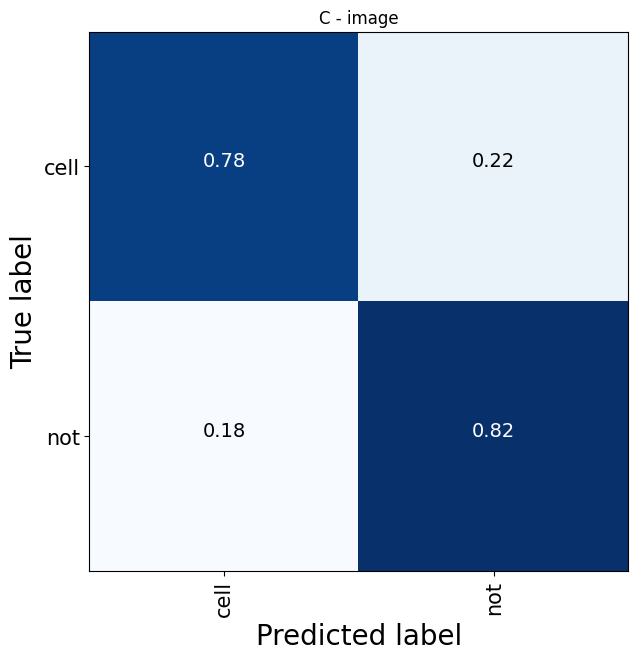

In [10]:
types_images=['cells', 'not']
images_groups = defaultdict(list)

for i in types_images:
  path_tmp=os.path.join(TEST_PATH,i)
  images=os.listdir(path_tmp)
  if i=='special_cells' or i=='cells' :
    y=[1,0]
  else:
    y=[0,1]

  for img in images:
      prefix = img[:1]
      path_image=os.path.join(path_tmp,img)
      img = image.load_img(path_image, color_mode='grayscale', target_size=(128, 128))
      img=np.array(img) / 255.0
      img = np.expand_dims(img, axis=-1)
      img = np.expand_dims(img, axis=0)
      images_groups[prefix].append([img,y])


images_groups  = dict(images_groups )

# model = load_model(MODEL_PATH)
model = keras.models.load_model(MODEL_PATH)
for name,imgs in images_groups.items():
  plot_conf_matrix(model, imgs, name + ' - image')

In [11]:
results_df = pd.DataFrame(results)

print(results_df)

       Model  Accuracy  Recall  Precision  Specificity
0  E - image      0.82    0.64   1.000000         1.00
1  B - image      0.98    0.98   0.980000         0.98
2  F - image      0.91    1.00   0.847458         0.82
3  A - image      0.99    1.00   0.980392         0.98
4  D - image      0.94    0.96   0.923077         0.92
5  C - image      0.80    0.78   0.812500         0.82


### Get predictions for special cells

In [12]:
types_images=['cells','not']
images_groups=[]

for i in types_images:
  path_tmp=os.path.join(TEST_PATH,i)
  images=os.listdir(path_tmp)
  if i=='special_cells' or i=='cells' :
    y=[1,0]
  else:
    y=[0,1]

  for img in images:
      path_image=os.path.join(path_tmp,img)
      img = image.load_img(path_image, color_mode='grayscale', target_size=(128, 128))
      img=np.array(img) / 255.0
      img = np.expand_dims(img, axis=-1)
      img = np.expand_dims(img, axis=0)
      images_groups.append([img,y])

model = load_model(MODEL_PATH)
label_test = []
pred_test = []
for i, batch in enumerate(images_groups):
    X, y = batch
    label_test.append(y)
    predictions = model.predict(X,verbose=0)
    pred_test.append(predictions)
label_test = np.argmax(np.vstack(label_test), axis=1)
### COMPUTE PREDICTIONS ON TEST DATA ###
pred_test = np.argmax(np.vstack(pred_test), axis=1)
accuracy=accuracy_score(label_test, pred_test)
recall=recall_score(label_test, pred_test,pos_label=0)
specificity=recall_score(label_test, pred_test,pos_label=1)
precision = precision_score(label_test, pred_test, pos_label=0)
# pred_test = pred_test[:label_test.shape[0],]
### ACCURACY ON TEST DATA ###
print("-" * 40)
print('ACCURACY:', accuracy)
print('RECALL:',recall)
print('PRECISION:', precision)
print('SPECIFICITY:',specificity)
print("-" * 40)
print("\n")

----------------------------------------
ACCURACY: 0.9066666666666666
RECALL: 0.8933333333333333
PRECISION: 0.9178082191780822
SPECIFICITY: 0.92
----------------------------------------


